# 0.0 Imports

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection as mt

# 1.0 Synthetic Regression Data

Em muitos problemas de regressão queremos descobrir qual é a lei matemática geral que descreve um fenômeno. Na grande maioria dos casos nós não sabemos de antemão qual é a dita lei, portanto nós a denominamos de `hidden_law`.

No exemplo a ser estudado vamos supor que nossa hidden law seja dada por:

$f(x) = \sin{(2\pi x)}$

In [3]:
# O método 'vectorize()' da biblioteca numpy recebe uma função e vetoriza ela, isto é, a torna capaz de
# de receber um objeto iterável e aplicar a função a cada elemento do iterável.
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x))

In [10]:
# Array que começa em 0 e termina em 1 com dados espaçados de 0.01 entre si
x_all = np.arange(0, 1, 0.01)

In [11]:
y_hidden = hidden_law(x_all)

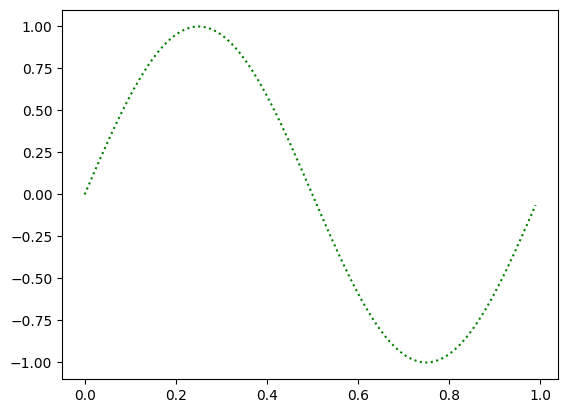

In [12]:
plt.plot(x_all, y_hidden, ':g')
plt.show()

In [20]:
np.random.seed(42)
noise = 0.2
samples = 20

# Criando o dataset

x = np.random.rand(samples)  # A função 'np.random.rand()' retorna valores aleatórios entre 0 e 1 
                             # (segue uma distribuição uniforme)

    
y = np.sin(2*np.pi*x) + noise * np.random.randn(samples) # A função 'np.random.randn()' retorna valores aleatórios 
                                                         # que seguem uma distribuição normal


# split training and test dataset
x_train, x_val, y_train, y_val = mt.train_test_split(x, y, test_size=0.3)

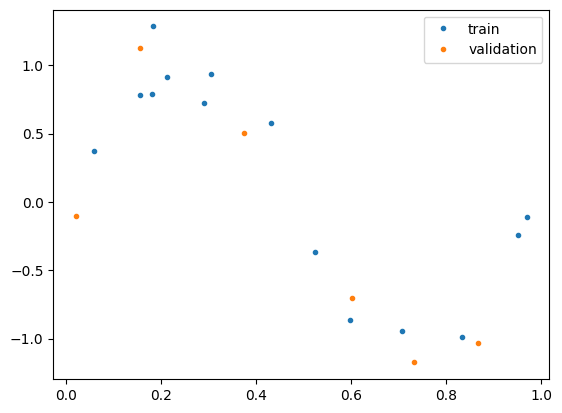

In [21]:
plt.plot(x_train, y_train, '.', label='train')
plt.plot(x_val, y_val, '.', label='validation')
plt.legend()
plt.show()

## Treinamento

In [22]:
max_poly_degree = 14
poly_degrees = range( max_poly_degree )

polys = []

for p in poly_degrees:
    
    poly_model = np.polyfit(x_train, y_train, p)  # A função 'polyfit()' retorna uma array com os coeficientes
                                                  # do polinômio de grau 'p' que minimizam o valor de R^2
    
    polys.append(poly_model)  # Armazena os coefiecientes optimizados para cada grau de polinômio

In [39]:
rmse_train = np.zeros(max_poly_degree)
rmse_val = np.zeros(max_poly_degree)



for p in poly_degrees:
    
    # predict over training dataset
    y_hat_train = np.polyval(polys[p], x_train)  # A função 'polyval()' calcula o valor do polinômio no ponto x,
                                                 # nela precisamos informar quais são os coeficientes do polinômio
                                                 # e o(s) ponto(s) onde queremos saber o valor de pol(x)
    
    rmse_train[p] = np.sqrt( np.mean( (y_hat_train - y_train)**2 ) )
    
    
    
    # predict over validation dataset
    y_hat_val = np.polyval(polys[p], x_val)
    rmse_val[p] = np.sqrt( np.mean( (y_hat_val - y_val)**2 ) )

In [40]:
rmse_train

array([7.48010894e-01, 4.82647443e-01, 4.57500886e-01, 1.59419591e-01,
       1.59306546e-01, 1.52223867e-01, 1.52144501e-01, 1.42795708e-01,
       1.39346325e-01, 1.10233380e-01, 1.02983626e-01, 9.76163692e-02,
       9.21585965e-02, 1.30634918e-04])

In [41]:
rmse_val

array([9.38249133e-01, 6.80235128e-01, 7.51630234e-01, 1.19254271e-01,
       1.18417510e-01, 1.92706777e-01, 1.85985915e-01, 2.64711881e-01,
       6.29967450e-01, 1.56191945e+00, 4.41637163e+00, 1.40669828e+01,
       4.05832200e+01, 9.73135052e+03])

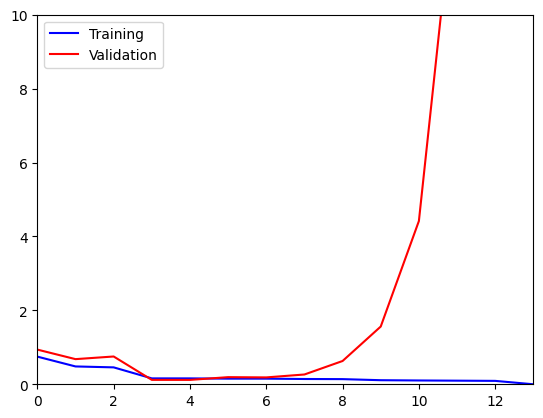

In [45]:
plt.plot(poly_degrees, rmse_train, '-b')
plt.plot(poly_degrees, rmse_val, '-r')

plt.axis( (0, max_poly_degree-1, 0, 10) )
plt.legend(['Training', 'Validation'])

plt.show()

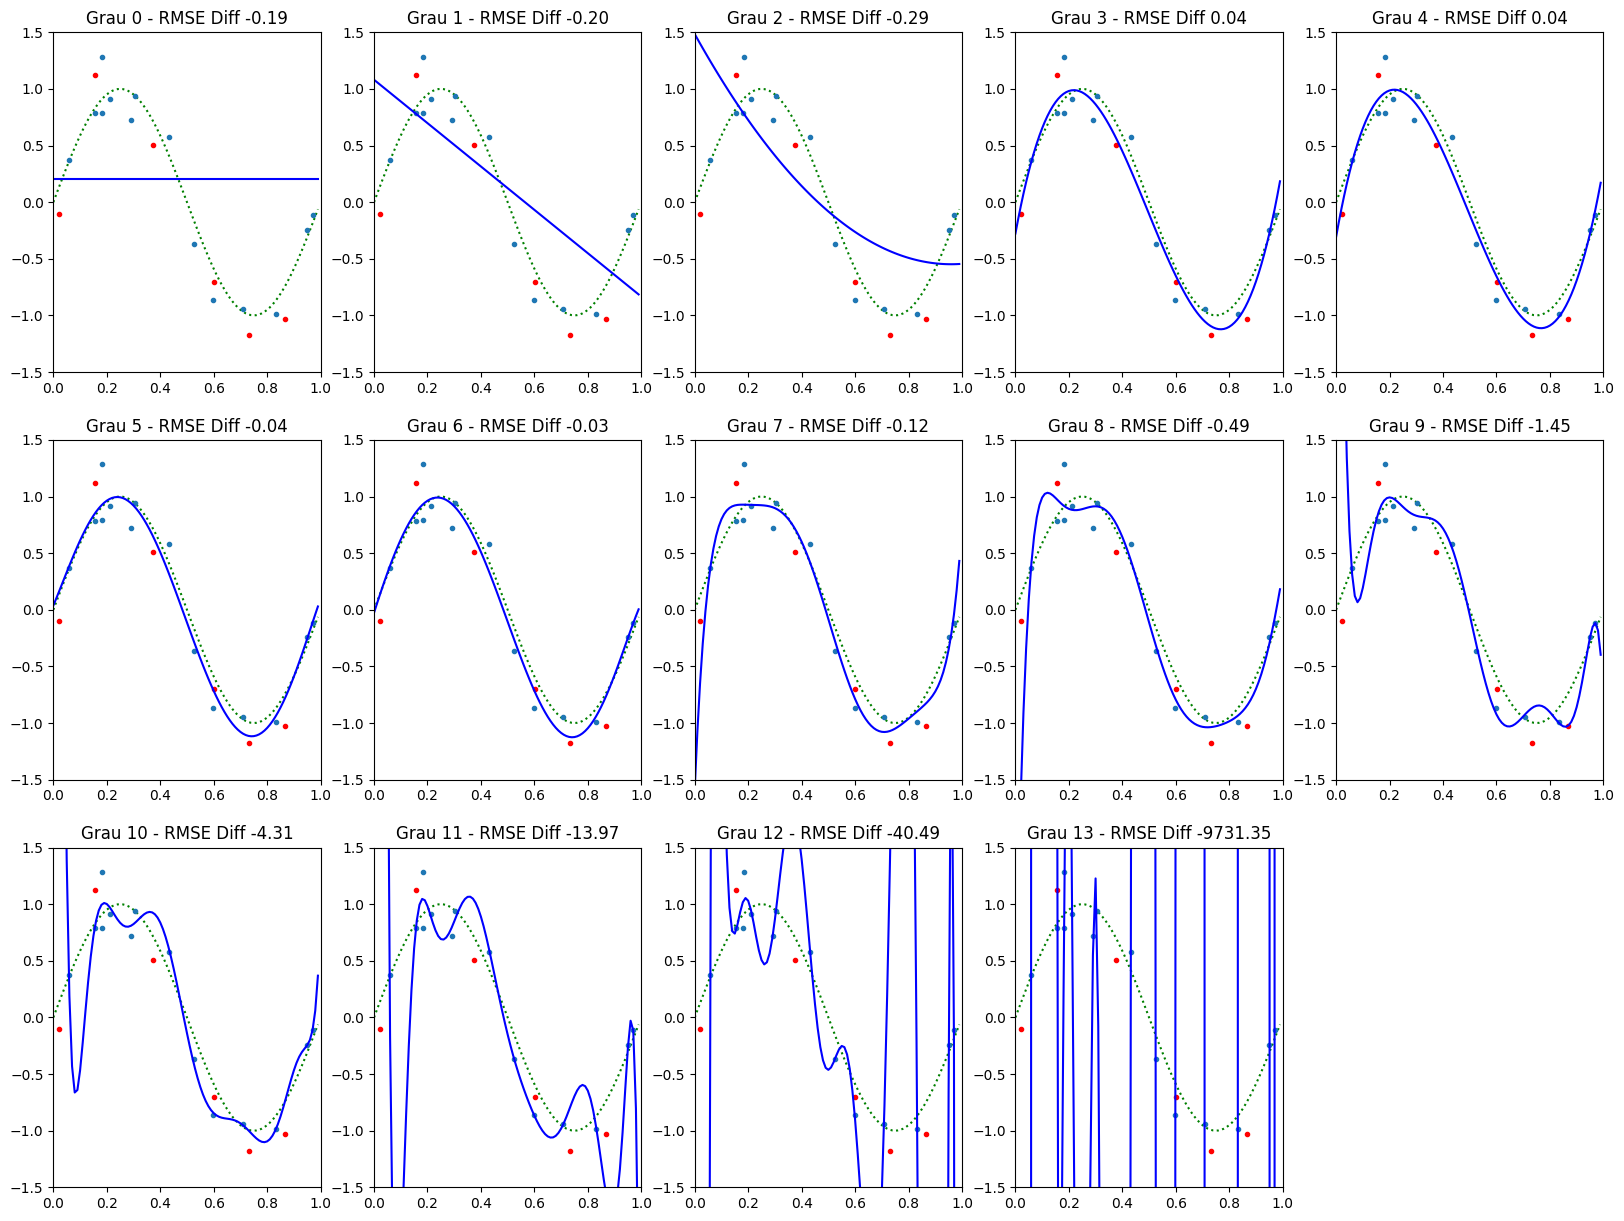

In [50]:
plt.figure(figsize=(20, 15))

for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    
    y_pol = np.polyval(polys[p], x_all)
    
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, '.r')
    plt.plot(x_all, y_pol, 'b')
    
    plt.title(f'Grau {p} - RMSE Diff {rmse_train[p] - rmse_val[p]:.2f}')
    plt.axis((0, 1, -1.5, 1.5))